---
## 📚 Krok 1: Import bibliotek

Zaimportujemy wszystkie potrzebne narzędzia do analizy modelu.

In [ ]:
# Podstawowe biblioteki do pracy z danymi
import pandas as pd  # Do pracy z tabelami danych
import numpy as np  # Do operacji matematycznych
import os  # Do operacji na folderach i plikach
import shutil  # Do przenoszenia plików

# PyCaret - framework do machine learning
from pycaret.classification import *  # Funkcje do modeli klasyfikacyjnych

# SHAP - biblioteka do interpretacji modeli
import shap  # Główna biblioteka SHAP
shap.initjs()  # Inicjalizacja wizualizacji JavaScript dla SHAP

# Biblioteki do wizualizacji
import matplotlib.pyplot as plt  # Podstawowa biblioteka do wykresów
import seaborn as sns  # Ładniejsze wykresy

# Ustawienia estetyczne dla wykresów
sns.set_style('whitegrid')  # Styl z białym tłem i siatką
plt.rcParams['figure.figsize'] = (12, 6)  # Domyślny rozmiar wykresów

# Import metadanych modelu
import json  # Do wczytania informacji o modelu

# Utworzenie folderów na wyniki (jeśli nie istnieją)
os.makedirs('plots', exist_ok=True)  # Folder na wykresy
os.makedirs('data', exist_ok=True)  # Folder na dane eksportowane

print("✅ Wszystkie biblioteki zaimportowane!")
print("✅ Foldery plots/ i data/ utworzone/zweryfikowane!")

✅ Wszystkie biblioteki zaimportowane!


---
## 📂 Krok 2: Wczytanie danych i modelu

Załadujemy dane treningowe i zapisany model. Model został wytrenowany w poprzednim projekcie i zapisany do folderu `model/`.

In [2]:
print("="*80)
print("📂 WCZYTYWANIE DANYCH I MODELU")
print("="*80)

# Wczytanie datasetu klientów telekomunikacyjnych
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"\n✅ Wczytano dane: {len(df)} klientów, {len(df.columns)} kolumn")

# Przygotowanie danych (takie same kroki jak podczas treningu)
df = df.drop('customerID', axis=1)  # Usunięcie kolumny ID (nie jest cechą predykcyjną)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Konwersja na liczby
df['TotalCharges'].fillna(0, inplace=True)  # Wypełnienie brakujących wartości zerem

print("✅ Dane przygotowane (usunięto ID, wypełniono braki)")

# Wyświetlenie pierwszych wierszy
print("\n📊 Pierwsze 3 wiersze danych:")
df.head(3)

📂 WCZYTYWANIE DANYCH I MODELU

✅ Wczytano dane: 7043 klientów, 21 kolumn
✅ Dane przygotowane (usunięto ID, wypełniono braki)

📊 Pierwsze 3 wiersze danych:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
# Wczytanie metadanych modelu (informacje o tym, jak był trenowany)
with open('model/metadata.json', 'r', encoding='utf-8') as f:
    metadata = json.load(f)  # Wczytanie pliku JSON z informacjami o modelu

# Wyświetlenie informacji o modelu
print("\n📋 Informacje o modelu:")
print(f"  Typ modelu: {metadata['model_type']}")  # Jaki algorytm (np. Logistic Regression)
print(f"  Optymalizacja: {metadata['optimized_for']}")  # Pod którą metrykę optymalizowano
print(f"  Data treningu: {metadata['train_date']}")  # Kiedy model został wytrenowany
print(f"  Próg decyzyjny: {metadata['threshold']}")  # Próg klasyfikacji (0.5 = 50%)


📋 Informacje o modelu:
  Typ modelu: LogisticRegression
  Optymalizacja: recall
  Data treningu: 2026-01-07 20:26:39
  Próg decyzyjny: 0.5


---
## ⚙️ Krok 3: Konfiguracja PyCaret i wczytanie modelu

PyCaret wymaga ponownej konfiguracji środowiska przed wczytaniem modelu. Musimy przygotować dane w taki sam sposób, jak podczas treningu.

In [4]:
print("="*80)
print("⚙️ KONFIGURACJA PYCARET")
print("="*80)

# Konfiguracja środowiska PyCaret (takie same ustawienia jak podczas treningu)
clf_setup = setup(
    data=df,  # Nasze dane
    target='Churn',  # Kolumna do przewidywania (Yes/No)
    session_id=123,  # Seed dla powtarzalności wyników
    train_size=0.8,  # 80% danych na trening, 20% na test
    fold=5,  # 5-krotna walidacja krzyżowa
    normalize=True,  # Normalizacja danych numerycznych
    verbose=False,  # Wyłączenie szczegółowych logów
    memory=False  # Wyłączenie cachowania (zapobiega problemom z kompatybilnością)
)

print("\n✅ PyCaret skonfigurowany (80/20 split, normalizacja włączona)")

⚙️ KONFIGURACJA PYCARET

✅ PyCaret skonfigurowany (80/20 split, normalizacja włączona)


In [5]:
# Wczytanie zapisanego modelu
print("\n💾 Wczytywanie modelu...")
loaded_model = load_model('model/churn_model')  # Ładowanie modelu z pliku .pkl

print(f"✅ Model wczytany: {type(loaded_model).__name__}")
print(f"\n📊 Szczegóły modelu:")
print(loaded_model)  # Wyświetlenie parametrów modelu


💾 Wczytywanie modelu...
Transformation Pipeline and Model Successfully Loaded
✅ Model wczytany: Pipeline

📊 Szczegóły modelu:
Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty...
                 TransformerWrapper(exclude=None, include=None,
                                

---
## 📊 Krok 4: Feature Importance - Które cechy są najważniejsze?

**Feature Importance** pokazuje, które cechy (kolumny) mają największy wpływ na decyzję modelu.

### 💡 Jak to działa:
- Każda cecha dostaje **wynik ważności** (im wyższy, tym ważniejsza)
- Model "sprawdza", jak bardzo zmiana danej cechy wpływa na predykcję
- To jak pytanie: *"Co by się stało, gdyby ta cecha się zmieniła?"*

### 🎯 Co to oznacza dla biznesu:
- **Najważniejsze cechy** → tu należy się skupić
- **Mało ważne cechy** → można je zignorować lub usunąć

📊 ANALIZA WAŻNOŚCI CECH (FEATURE IMPORTANCE)

📋 Liczba cech w modelu: 19

🔍 Generowanie wykresu Feature Importance...



📊 ANALIZA WAŻNOŚCI CECH (FEATURE IMPORTANCE)

📋 Liczba cech w modelu: 19

🔍 Generowanie wykresu Feature Importance...



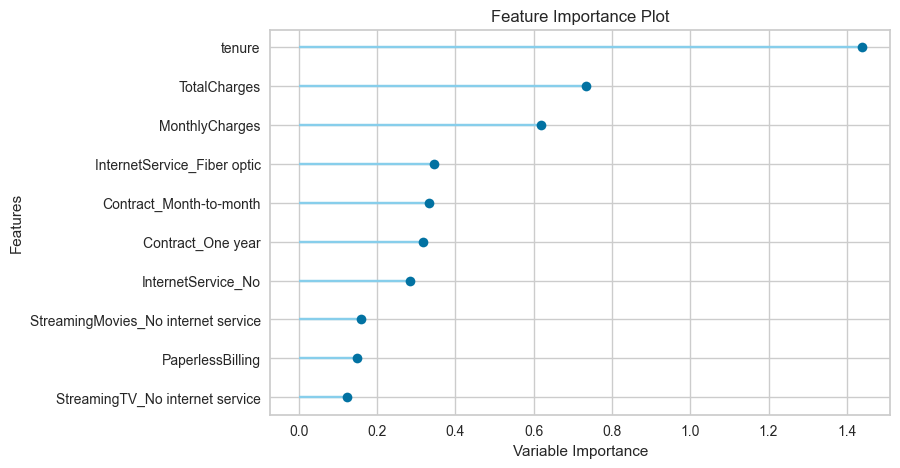

📊 ANALIZA WAŻNOŚCI CECH (FEATURE IMPORTANCE)

📋 Liczba cech w modelu: 19

🔍 Generowanie wykresu Feature Importance...



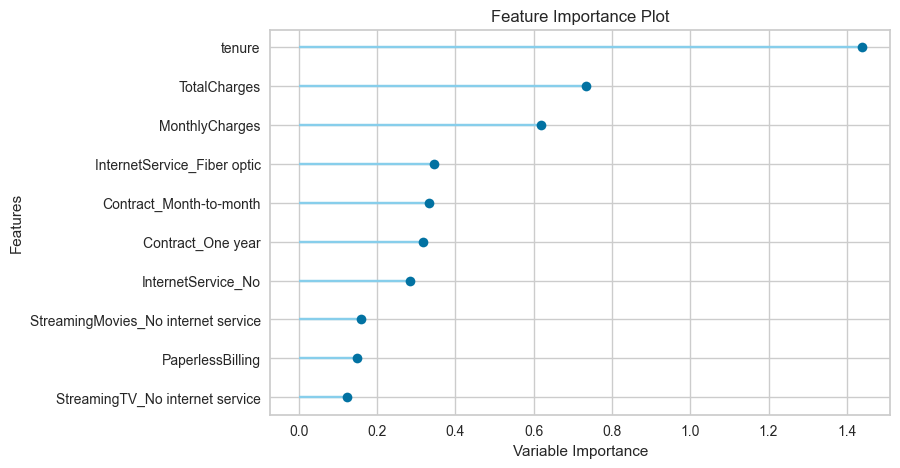

📊 ANALIZA WAŻNOŚCI CECH (FEATURE IMPORTANCE)

📋 Liczba cech w modelu: 19

🔍 Generowanie wykresu Feature Importance...



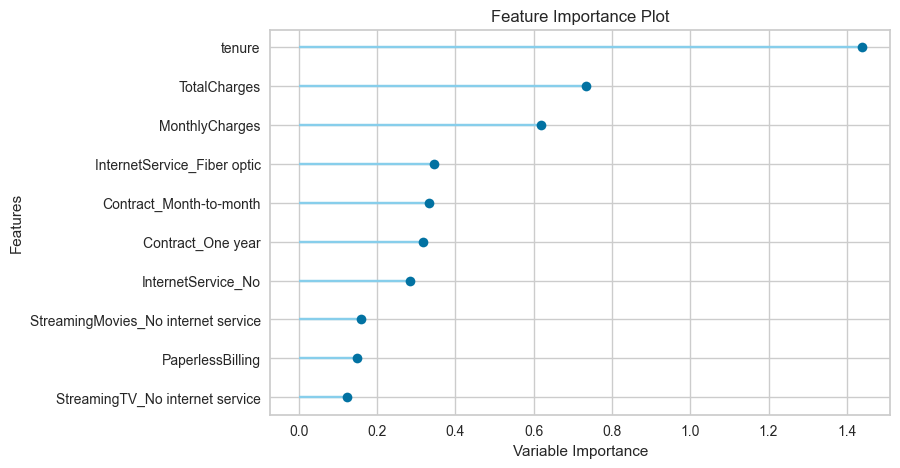


✅ Wykres zapisany jako: Feature Importance.png


In [ ]:
print("="*80)
print("📊 ANALIZA WAŻNOŚCI CECH (FEATURE IMPORTANCE)")
print("="*80)

# Wyciągnięcie nazw wszystkich cech (kolumn) użytych w modelu
feature_names = get_config('X_train').columns.tolist()
print(f"\n📋 Liczba cech w modelu: {len(feature_names)}")

# Wyświetlenie feature importance przy użyciu PyCaret
print("\n🔍 Generowanie wykresu Feature Importance...\n")
plot_model(loaded_model, plot='feature')  # Wyświetlenie w notebooku

# Zapis wykresu do pliku
plot_model(loaded_model, plot='feature', save=True)  # Zapis do pliku (domyślnie w katalogu głównym)

# Przeniesienie pliku do folderu plots
import shutil
if os.path.exists('Feature Importance.png'):
    shutil.move('Feature Importance.png', 'plots/Feature Importance.png')
    print("\n✅ Wykres zapisany jako: plots/Feature Importance.png")
else:
    print("\n⚠️ Plik Feature Importance.png nie został znaleziony")

### 📖 Jak interpretować Feature Importance:

**Wykres pokazuje:**
- **Oś Y**: Nazwy cech (np. tenure, Contract, MonthlyCharges)
- **Oś X**: Ważność cechy (im dłuższy pasek, tym ważniejsza)

**📋 Objaśnienie głównych kolumn w danych:**

- **tenure** - liczba miesięcy, przez które klient korzysta z usług
- **Contract** - typ umowy (Month-to-month/One year/Two year)
- **MonthlyCharges** - miesięczne opłaty pobierane od klienta
- **InternetService** - rodzaj usługi internetowej (DSL/Fiber optic/No)
- **TotalCharges** - łączna kwota opłat od początku współpracy
- **PaymentMethod** - metoda płatności (Electronic check/Mailed check/Bank transfer/Credit card)
- **OnlineSecurity** - czy klient ma usługę ochrony online (Yes/No)
- **TechSupport** - czy klient ma wsparcie techniczne (Yes/No)
- **PaperlessBilling** - czy klient używa e-faktur (Yes/No)
- **Partner** - czy klient ma partnera/małżonka (Yes/No)
- **Dependents** - czy klient ma osoby na utrzymaniu (Yes/No)

**Przykładowa interpretacja:**

1. **tenure** (długość bycia klientem) - najważniejsza cecha
   - *Biznesowo*: Nowi klienci częściej odchodzą!
   - *Działanie*: Program lojalnościowy dla nowych klientów

2. **Contract** (rodzaj umowy) - bardzo ważna
   - *Biznesowo*: Umowy miesięczne = wyższe ryzyko odejścia
   - *Działanie*: Zachęty do dłuższych kontraktów

3. **MonthlyCharges** (miesięczne opłaty)
   - *Biznesowo*: Wyższe opłaty = większe ryzyko
   - *Działanie*: Programy rabatowe dla droższych pakietów

**⚠️ Ważne:** Feature Importance pokazuje *które* cechy są ważne, ale nie *jak* wpływają (pozytywnie czy negatywnie). Do tego użyjemy SHAP!

---
## 🎯 Krok 5: SHAP - Głęboka analiza wpływu cech

**SHAP (SHapley Additive exPlanations)** to zaawansowana metoda interpretacji modeli ML.

### 🎯 Cele analizy:
- Zrozumienie **jak** każda cecha wpływa na predykcję
- Wizualizacja kierunku wpływu (+ lub -)
- Analiza pojedynczych klientów
- Eksport danych do dalszej analizy

### 📊 Wykresy które stworzymy:
1. **Summary Plot** - kompleksowy widok wpływu wszystkich cech
2. **Bar Plot** - prosty ranking cech
3. **Force Plot** - analiza konkretnego klienta
4. **Eksport CSV** - dane do dalszej analizy


In [14]:
print("="*80)
print("🎯 ANALIZA SHAP")
print("="*80)

# Przygotowanie danych do analizy SHAP - używamy danych PRZED transformacją
# PyCaret predict_model() automatycznie wykona transformacje
X_train = get_config('X_train')  # Dane oryginalne (przed encoding i normalizacją)
print(f"\n📊 Rozmiar danych treningowych: {X_train.shape[0]} wierszy, {X_train.shape[1]} kolumn")

# Dla większych zbiorów danych - użyjemy próbki (szybsze obliczenia)
sample_size = 500  # Liczba klientów do analizy
X_sample = X_train.sample(n=min(sample_size, len(X_train)), random_state=42)  # Losowa próbka
print(f"📋 Użyto próbki: {len(X_sample)} klientów (dla szybszych obliczeń)")
print(f"📋 Nazwy cech: {list(X_sample.columns)[:5]}... (pierwsze 5)")

🎯 ANALIZA SHAP

📊 Rozmiar danych treningowych: 5634 wierszy, 19 kolumn
📋 Użyto próbki: 500 klientów (dla szybszych obliczeń)
📋 Nazwy cech: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']... (pierwsze 5)


---
## 📊 Krok 6: Szczegółowa analiza SHAP z biblioteką SHAP

**Biblioteka SHAP** daje nam pełną kontrolę nad analizą i wizualizacjami.

### 💡 Dlaczego SHAP bezpośrednio?
- Pełna kontrola nad wizualizacjami
- Uniwersalny Explainer działa z Logistic Regression
- Możliwość zapisu wykresów do plików
- Eksport danych do CSV dla dalszej analizy

In [20]:
# Utworzenie eksplanera SHAP dla Logistic Regression
print("\n🔄 Tworzenie eksplanera SHAP...")

# Funkcja pomocnicza dla PyCaret predict_model
def model_predict(data):
    preds = predict_model(loaded_model, data=pd.DataFrame(data, columns=X_sample.columns))
    return preds['prediction_score_1'].values if 'prediction_score_1' in preds.columns else preds['prediction_score'].values

# KernelExplainer - najlepszy dla modeli z mieszanymi typami danych
# Jest wolniejszy ale działa niezawodnie z danymi kategorycznymi i numerycznymi
explainer = shap.KernelExplainer(model_predict, shap.sample(X_sample, 100))
print("✅ KernelExplainer utworzony (kompatybilny z danymi kategorycznymi i numerycznymi)")


🔄 Tworzenie eksplanera SHAP...


✅ KernelExplainer utworzony (kompatybilny z danymi kategorycznymi i numerycznymi)


In [21]:
# Obliczenie wartości SHAP dla każdego klienta
print("\n🔄 Obliczanie wartości SHAP (to może potrwać 2-3 minuty)...")

# KernelExplainer używa metody shap_values()
shap_values = explainer.shap_values(X_sample)  # Obliczenie wpływu każdej cechy dla każdego klienta

print("✅ Wartości SHAP obliczone!")
print(f"📊 Kształt wyników: {shap_values.shape}")


🔄 Obliczanie wartości SHAP (to może potrwać 2-3 minuty)...


  0%|          | 0/500 [00:00<?, ?it/s]

✅ Wartości SHAP obliczone!
📊 Kształt wyników: (500, 19)


---
## 📊 Krok 7: SHAP Summary Plot - Kompleksowa wizualizacja

**Summary Plot** to najważniejsza wizualizacja w SHAP. Pokazuje kompletny obraz wpływu cech.

### 📖 Jak czytać ten wykres:

**Oś Y (pionowa):**
- Nazwy cech uporządkowane według ważności (najważniejsze na górze)

**Oś X (pozioma):**
- SHAP value (wpływ na predykcję)
- **Lewa strona** (wartości ujemne) → zmniejsza ryzyko churn
- **Prawa strona** (wartości dodatnie) → zwiększa ryzyko churn

**Kolory punktów:**
- 🔴 **Czerwony** = wysoka wartość cechy (np. wysokie MonthlyCharges)
- 🔵 **Niebieski** = niska wartość cechy (np. niskie MonthlyCharges)

**Gęstość punktów:**
- Każdy punkt = jeden klient
- Więcej punktów = częstsza wartość cechy

📊 SHAP SUMMARY PLOT

✅ Wykres zapisany jako: plots/shap_summary_plot.png


📊 SHAP SUMMARY PLOT

✅ Wykres zapisany jako: plots/shap_summary_plot.png


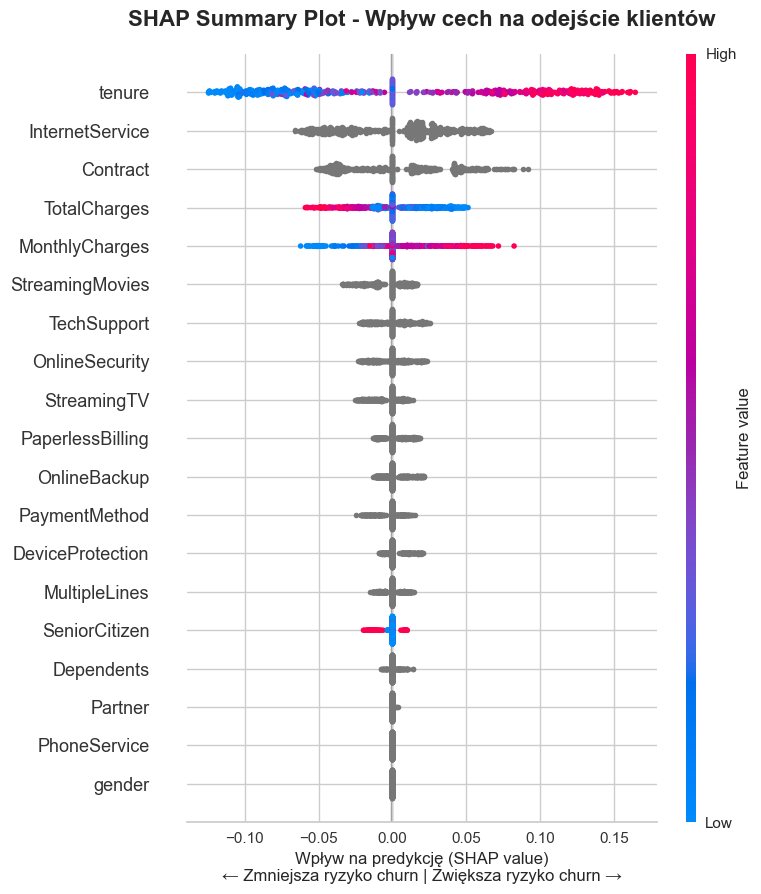

In [34]:
# Generowanie SHAP Summary Plot
print("="*80)
print("📊 SHAP SUMMARY PLOT")
print("="*80)

plt.figure(figsize=(12, 8))  # Większy wykres dla lepszej czytelności

# Uniwersalny Explainer zwraca wartości dla klasy pozytywnej
# Jeśli są 2 klasy, mamy kształ (n_samples, n_features)
shap_values_to_plot = shap_values

# Utworzenie wykresu SHAP
shap.summary_plot(
    shap_values_to_plot,  # Wartości SHAP (wpływ cech)
    X_sample,  # Dane (wartości cech)
    feature_names=X_sample.columns,  # Nazwy cech
    show=False  # Nie pokazuj od razu (zapiszemy do pliku)
)

# Dodanie tytułu i opisów
plt.title('SHAP Summary Plot - Wpływ cech na odejście klientów', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Wpływ na predykcję (SHAP value)\n← Zmniejsza ryzyko churn | Zwiększa ryzyko churn →', fontsize=12)
plt.tight_layout()  # Automatyczne dopasowanie layoutu

# Zapis wykresu
plt.savefig('plots/shap_summary_plot.png', dpi=300, bbox_inches='tight')  # Wysoka rozdzielczość
print("\n✅ Wykres zapisany jako: plots/shap_summary_plot.png")

plt.show()  # Wyświetlenie wykresu

---
## 💼 Krok 8: Interpretacja biznesowa - Konkretne wnioski

Na podstawie wykresu SHAP możemy wyciągnąć **konkretne wnioski biznesowe**.

### 🎯 JAK CZYTAĆ WYKRES SHAP (BARDZO WAŻNE!):

**Kluczowa zasada:** KOLOR punktu + POZYCJA na osi X = wpływ na churn

- 🔵 **Niebieski po prawej** (dodatnie SHAP) = niska wartość cechy → ZWIĘKSZA churn
- 🔴 **Czerwony po lewej** (ujemne SHAP) = wysoka wartość cechy → ZMNIEJSZA churn
- 🔴 **Czerwony po prawej** (dodatnie SHAP) = wysoka wartość cechy → ZWIĘKSZA churn  
- 🔵 **Niebieski po lewej** (ujemne SHAP) = niska wartość cechy → ZMNIEJSZA churn

### 📋 WNIOSKI Z NASZEGO WYKRESU:

#### 🏆 1. **tenure** (czas bycia klientem) - NAJWAŻNIEJSZA CECHA!
- 🔵 **Niebieskie punkty po PRAWEJ** = krótki tenure (nowi klienci) → **MASOWO ODCHODZĄ!**
- 🔴 **Czerwone punkty po LEWEJ** = długi tenure (starzy klienci) → **POZOSTAJĄ!**

**Wniosek:** Pierwsze 6-12 miesięcy to KRYTYCZNY okres!

**Działanie** (NAJWYŻSZY PRIORYTET):
  - 🎯 Program onboardingu dla nowych klientów (0-3 miesiące)
  - 📞 Proaktywny kontakt w 1., 3., 6. miesiącu
  - 🎁 Rabat/bonus w 2. miesiącu ("zostań z nami")
  - 📚 Edukacja: jak korzystać z usług, co jest dostępne

#### 💰 2. **TotalCharges** (łączne opłaty) - PARADOKS!
- 🔴 **Czerwone punkty po LEWEJ** = wysokie TotalCharges → **ZMNIEJSZA churn**
- 🔵 **Niebieskie punkty po PRAWEJ** = niskie TotalCharges → **ZWIĘKSZA churn**

**Wniosek:** Klienci którzy zapłacili dużo łącznie = LOJALNI (bo byli długo)!  
To potwierdza efekt tenure - długi staż = wysokie total charges = lojalność

**Działanie:**
  - To naturalna konsekwencja tenure, nie wymaga osobnych działań

#### 💵 3. **MonthlyCharges** (miesięczne opłaty)
- 🔴 **Czerwone punkty po PRAWEJ** = wysokie miesięczne opłaty → **ZWIĘKSZA churn**
- 🔵 **Niebieskie punkty bliżej centrum/lewej** = niskie opłaty → mniejsze ryzyko

**Wniosek:** Wysokie MIESIĘCZNE opłaty irytują klientów!
### 🎯 PRIORYTETOWE DZIAŁANIA (na podstawie SHAP):
**Działanie:**
#### 🚨 Profil NAJWYŻSZEGO ryzyka:
1. **tenure < 6 miesięcy** (nowy klient) - KLUCZOWE!
2. **MonthlyCharges > 70 zł** (wysokie miesięczne opłaty)
3. **TotalCharges < 500 zł** (potwierdza że nowy)

#### 📋 Strategia retencyjna - 4 kroki:

**KROK 1: Identyfikacja** 
- Model przewiduje ryzyko churn (score > 0.7)
- Filtruj klientów z tenure < 6 miesięcy





















👉 **Skoncentruj 80% budżetu retencyjnego na klientów 0-6 miesięcy!**Nie tracisz klientów przez cenę - tracisz ich bo są NOWI.  **Wykres SHAP pokazuje, że tenure to DOMINUJĄCY czynnik!**  ### 🎁 KLUCZOWY WNIOSEK:- ROI kampanii (koszt rabatów vs uratowani klienci)- Mierzenie retention rate po 3 miesiącach- A/B testing różnych strategii**KROK 4: Monitoring**- Darmowe usługi dodatkowe (OnlineSecurity, TechSupport)- Rabat na 2-3 kolejne miesiące- Email/SMS z personalizowaną ofertą**KROK 3: Akcja** (dedykowane kampanie)- Segment C: Nowi + Fiber optic → edu + tech support- Segment B: Nowi + brak usług dodatkowych → cross-sell- Segment A: Nowi + drogie pakiety → oferta rabatowa**KROK 2: Segmentacja** (SHAP wyjaśnia DLACZEGO)
**Grupa WYSOKIEGO ryzyka** (najwyższy priorytet):
- ✅ Nowi klienci (tenure < 6 miesięcy)
- ✅ Umowy miesięczne
- ✅ Wysokie MonthlyCharges
- ✅ Fiber optic bez dodatkowych usług

**Strategia retencyjna:**
1. **Identyfikacja** → model wskazuje ryzykownych klientów
2. **Segmentacja** → zrozumienie przyczyn (SHAP)
3. **Akcja** → dedykowane oferty dla każdej grupy
4. **Monitoring** → śledzenie efektywności działań

---
## 📊 Krok 9: SHAP Bar Plot - Średni wpływ cech

**SHAP Bar Plot** pokazuje **średni absolutny wpływ** każdej cechy. To uproszczona wersja Summary Plot.

### 💡 Różnica między Summary Plot a Bar Plot:
- **Summary Plot** → szczegółowy, pokazuje kierunek i rozkład
- **Bar Plot** → prosty, pokazuje tylko średnią ważność

### 🔄 SHAP Bar Plot vs Feature Importance (Krok 4):

**Czym się różnią?**

1. **Feature Importance (Krok 4):**
   - Pokazuje **współczynniki modelu** (dla Logistic Regression)
   - Szybkie do obliczenia
   - Zakłada liniową zależność
   - **Teoretyczne** znaczenie cech

2. **SHAP Bar Plot (tutaj):**
   - Pokazuje **rzeczywisty wpływ** na predykcje
   - Obliczone na **konkretnych danych** (500 klientów)
   - Uwzględnia interakcje między cechami
   - **Praktyczne** znaczenie cech

**Dla Logistic Regression:** Wykresy są bardzo podobne! 📊  
**Dla innych modeli** (Random Forest, XGBoost): Mogą być duże różnice!

**Dlaczego pokazujemy oba?**
- Feature Importance = szybki przegląd modelu
- SHAP = głębsza analiza rzeczywistego działania

**Bar Plot jest świetny do:**
- Prezentacji dla managementu (prosty przekaz)
- Szybkiego rankingu cech
- Raportowania

📊 SHAP BAR PLOT - RANKING CECH

✅ Wykres zapisany jako: plots/shap_bar_plot.png


📊 SHAP BAR PLOT - RANKING CECH

✅ Wykres zapisany jako: plots/shap_bar_plot.png


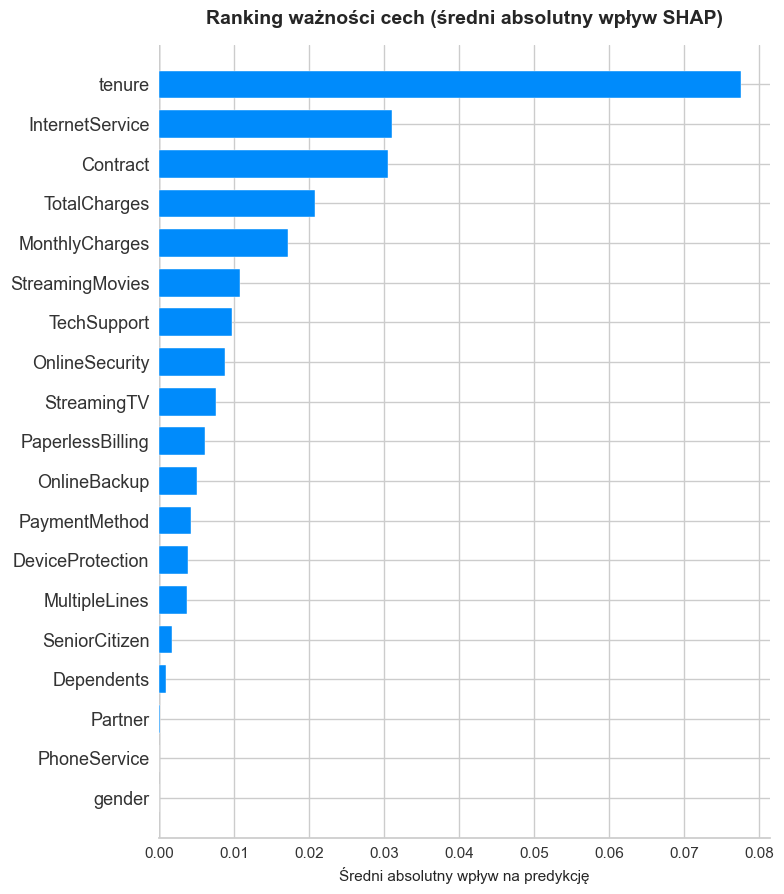

In [35]:
print("="*80)
print("📊 SHAP BAR PLOT - RANKING CECH")
print("="*80)

plt.figure(figsize=(10, 6))  # Rozmiar wykresu

# Utworzenie bar plot (wykres słupkowy)
shap.summary_plot(
    shap_values_to_plot,  # Wartości SHAP
    X_sample,  # Dane
    feature_names=X_sample.columns,  # Nazwy cech
    plot_type='bar',  # Typ wykresu: słupkowy
    show=False  # Nie pokazuj od razu
)

# Dodanie tytułu
plt.title('Ranking ważności cech (średni absolutny wpływ SHAP)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Średni absolutny wpływ na predykcję', fontsize=11)
plt.tight_layout()

# Zapis wykresu
plt.savefig('plots/shap_bar_plot.png', dpi=300, bbox_inches='tight')
print("\n✅ Wykres zapisany jako: plots/shap_bar_plot.png")

plt.show()

### 📖 Interpretacja Bar Plot:

**Wykres pokazuje** średni absolutny wpływ każdej cechy na wszystkie predykcje.

**Jak czytać:**
- Im dłuższy słupek, tym większy średni wpływ cechy
- To NIE pokazuje kierunku (+ czy -), tylko siłę wpływu

**Użycie w biznesie:**
- 📊 **Prezentacje** → prosty, czytelny wykres
- 🎯 **Priorytetyzacja** → na które cechy się skupić
- 💰 **ROI** → które zmiany będą miały największy wpływ

---
## 🎯 Krok 10: Analiza pojedynczego klienta (Force Plot)

**Force Plot** pokazuje, **dlaczego model podjął decyzję dla KONKRETNEGO klienta**.

### 💡 Co pokazuje Force Plot:
- **Base value** (wartość bazowa) → średnia predykcja dla wszystkich
- **Czerwone strzałki** → cechy zwiększające ryzyko churn
- **Niebieskie strzałki** → cechy zmniejszające ryzyko churn
- **Output value** (wynik) → finalna predykcja dla tego klienta

**Przykład użycia:**
"Klient #1234 ma 85% prawdopodobieństwo odejścia, ponieważ:
- Ma umowę miesięczną (+0.3)
- Jest nowym klientem (+0.25)
- Płaci dużo (+0.15)
ale
- Ma usługi dodatkowe (-0.1)"

In [26]:
print("="*80)
print("🔍 ANALIZA POJEDYNCZEGO KLIENTA (FORCE PLOT)")
print("="*80)

# Wybierzmy klienta z wysokim ryzykiem churn
customer_idx = 0  # Indeks klienta (możesz zmienić na inny)

print(f"\n👤 Analiza klienta #{customer_idx}")
print(f"\n📊 Cechy tego klienta:")
print(X_sample.iloc[customer_idx])  # Wyświetlenie wszystkich cech klienta

🔍 ANALIZA POJEDYNCZEGO KLIENTA (FORCE PLOT)

👤 Analiza klienta #0

📊 Cechy tego klienta:
gender                                 Male
SeniorCitizen                             0
Partner                                  No
Dependents                               No
tenure                                   36
PhoneService                            Yes
MultipleLines                            No
InternetService                          No
OnlineSecurity          No internet service
OnlineBackup            No internet service
DeviceProtection        No internet service
TechSupport             No internet service
StreamingTV             No internet service
StreamingMovies         No internet service
Contract                           One year
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                        20.35
TotalCharges                     695.849976
Name: 4113, dtype: object



🔄 Generowanie Force Plot...

✅ Force plot zapisany jako: plots/shap_force_plot_customer_0.png



🔄 Generowanie Force Plot...

✅ Force plot zapisany jako: plots/shap_force_plot_customer_0.png


<Figure size 2000x300 with 0 Axes>


🔄 Generowanie Force Plot...

✅ Force plot zapisany jako: plots/shap_force_plot_customer_0.png


<Figure size 2000x300 with 0 Axes>

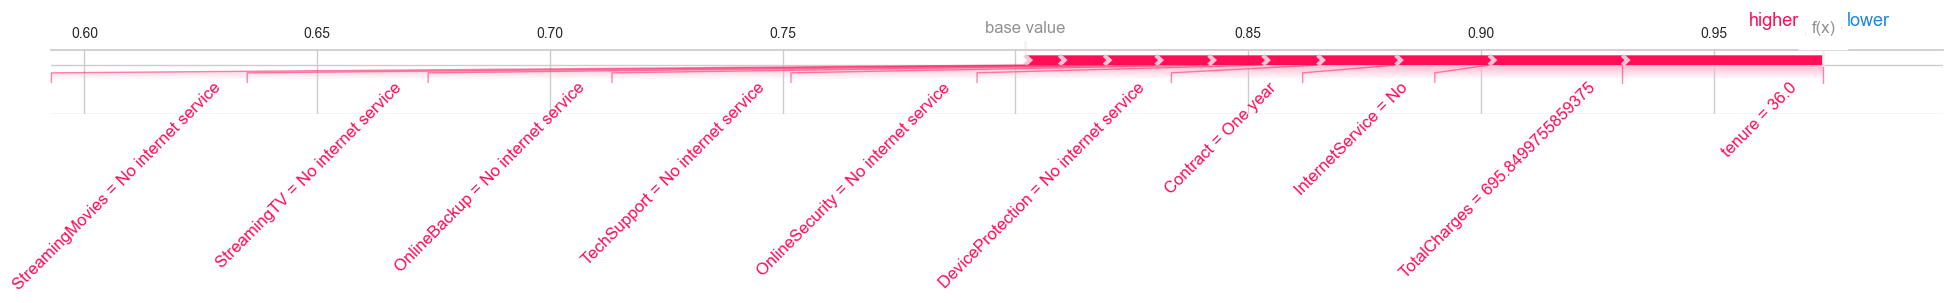

In [33]:
# Utworzenie Force Plot dla tego klienta
print("\n🔄 Generowanie Force Plot...")

# Zwiększamy rozmiar wykresu dla lepszej czytelności
plt.figure(figsize=(20, 3))  # Szeroki wykres = więcej miejsca na etykiety

# Force plot wymaga specjalnej wizualizacji
shap.force_plot(
    explainer.expected_value,  # Base value (średnia predykcja)
    shap_values_to_plot[customer_idx],  # Wartości SHAP dla tego klienta
    X_sample.iloc[customer_idx],  # Cechy tego klienta
    matplotlib=True,  # Użycie matplotlib (zamiast JavaScript)
    show=False,  # Nie pokazuj od razu
    text_rotation=45  # Obrót etykiet dla lepszej czytelności
)

# Dostosowanie czcionki
plt.gcf().set_size_inches(20, 3)  # Potwierdzenie rozmiaru
plt.tight_layout()

# Zapis wykresu
plt.savefig(f'plots/shap_force_plot_customer_{customer_idx}.png', dpi=300, bbox_inches='tight')
print(f"\n✅ Force plot zapisany jako: plots/shap_force_plot_customer_{customer_idx}.png")

plt.show()

### 📖 Jak czytać Force Plot:

**Struktura wykresu:**
- **Lewa strona** → wartość bazowa (średnia dla wszystkich)
- **Środek** → cechy "pchające" predykcję w górę lub w dół
- **Prawa strona** → finalna predykcja dla tego klienta

**Kolory:**
- 🔴 **Czerwony** → cechy zwiększające prawdopodobieństwo churn
- 🔵 **Niebieski** → cechy zmniejszające prawdopodobieństwo churn

**💡 Wskazówka:** Jeśli wykres jest za gęsty, możesz:
- Zwiększyć `figsize` w kodzie (np. `(25, 3)`)
- Lub użyć poniższego Waterfall Plot (bardziej czytelny!)

**Zastosowanie biznesowe:**
- 📞 **Call center** → "Dlaczego ten klient jest zagrożony?"
- 💰 **Oferty** → Dedykowane działania oparte na konkretnych cechach
- 📝 **Dokumentacja** → Uzasadnienie decyzji (zgodność z GDPR)

### 📖 Jak czytać Waterfall Plot:

**Wykres pokazuje "wodospad" wpływów:**
- **Na dole:** wartość bazowa (E[f(X)] - średnia dla wszystkich)
- **Słupki w górę (czerwone):** cechy zwiększające prawdopodobieństwo churn
- **Słupki w dół (niebieskie):** cechy zmniejszające prawdopodobieństwo churn
- **Na górze:** finalna predykcja f(x) dla tego klienta

**Zalety Waterfall vs Force Plot:**
- ✅ Większe, czytelne etykiety
- ✅ Łatwiej zobaczyć konkretne wartości
- ✅ Lepiej się drukuje/prezentuje
- ✅ Pokazuje tylko najważniejsze cechy (top 15)

### ⚠️ BARDZO WAŻNE - Różnica między Summary Plot a Waterfall:

**Summary Plot (Krok 7):**
- Pokazuje wpływ cech dla **WSZYSTKICH 500 klientów** (uśredniony)
- "Ogólnie rzecz biorąc, jak cechy wpływają na model"

**Waterfall Plot (tutaj):**
- Pokazuje wpływ cech dla **JEDNEGO konkretnego klienta**
- "Dlaczego TEN konkretny klient ma takie ryzyko"

### 🎯 Przykład różnic (NORMALNE!):

**W Summary Plot widzieliśmy:**
- TotalCharges: wysokie → ZMNIEJSZA churn (bo długi staż)
- MonthlyCharges: wysokie → ZWIĘKSZA churn

**Dla TEGO konkretnego klienta (Waterfall):**
- TotalCharges = 695.85 → ZWIĘKSZA churn (+0.03)
- MonthlyCharges = 20.35 → wpływ ~0 (niska wartość)

**Dlaczego tak jest?**
1. **Ten klient** ma TotalCharges = 695.85 + tenure = 36 miesięcy
   - 695.85 / 36 ≈ 19.3 zł/mies (niskie!)
   - To znaczy płacił MAŁO przez długi czas = słaba relacja z firmą

2. **Ten klient** ma MonthlyCharges = 20.35 (bardzo niskie!)
   - Średnia to ~64 zł, więc ta cecha nie zwiększa ryzyka u TEGO klienta

**Przykład odczytu:**
"Klient #0 ma 97.4% prawdopodobieństwo churn, ponieważ:
- tenure = 36.0 (relatywnie niska wartość) dodaje +0.04 do ryzyka
- TotalCharges = 695.85 (niska w stosunku do tenure) dodaje +0.03 do ryzyka
- InternetService = No dodaje +0.02 do ryzyka
- Contract = One year (nie Month-to-month!) dodaje +0.02 do ryzyka"

**💡 Kluczowa lekcja:** 
Waterfall pozwala zobaczyć, że każdy klient jest INNY!  
Summary Plot = strategia ogólna  
Waterfall Plot = akcja dla konkretnego klienta

---
### 💼 Praktyczna analiza - co zrobić z tym klientem?

Na podstawie Waterfall Plot dla klienta #0 widzimy:

**Profil klienta:**
- tenure = 36 miesięcy (3 lata) - średni staż
- TotalCharges = 695.85 zł - niskie dla 3 lat! (19.3 zł/mies)
- MonthlyCharges = 20.35 zł - bardzo niski pakiet
- Contract = One year - ma kontrakt, ale niedługi
- Brak usług dodatkowych (InternetService = No)

**Diagnoza:**
Ten klient jest "dormant customer" (uśpiony):
- ✅ Jest już 3 lata (dobry znak)
- ❌ Płaci bardzo mało (brak zaangażowania)
- ❌ Nie korzysta z internetu ani usług dodatkowych
- ❌ Ma krótki kontrakt (One year)

**Rekomendowana akcja:**
1. **Cross-sell:** Zaproponuj pakiet internetowy + TV
2. **Upgrade:** "Płacisz 20 zł, za 40 zł dostaniesz 3x więcej!"
3. **Long-term contract:** Rabat za przejście na 2-letni kontrakt
4. **Bundle deal:** Internet + telefon taniej razem

**Cel:** Zwiększyć MonthlyCharges (zaangażowanie) i przedłużyć kontrakt


🌊 Generowanie Waterfall Plot (bardziej czytelny)...
✅ Waterfall plot zapisany jako: plots/shap_waterfall_plot_customer_0.png



🌊 Generowanie Waterfall Plot (bardziej czytelny)...
✅ Waterfall plot zapisany jako: plots/shap_waterfall_plot_customer_0.png


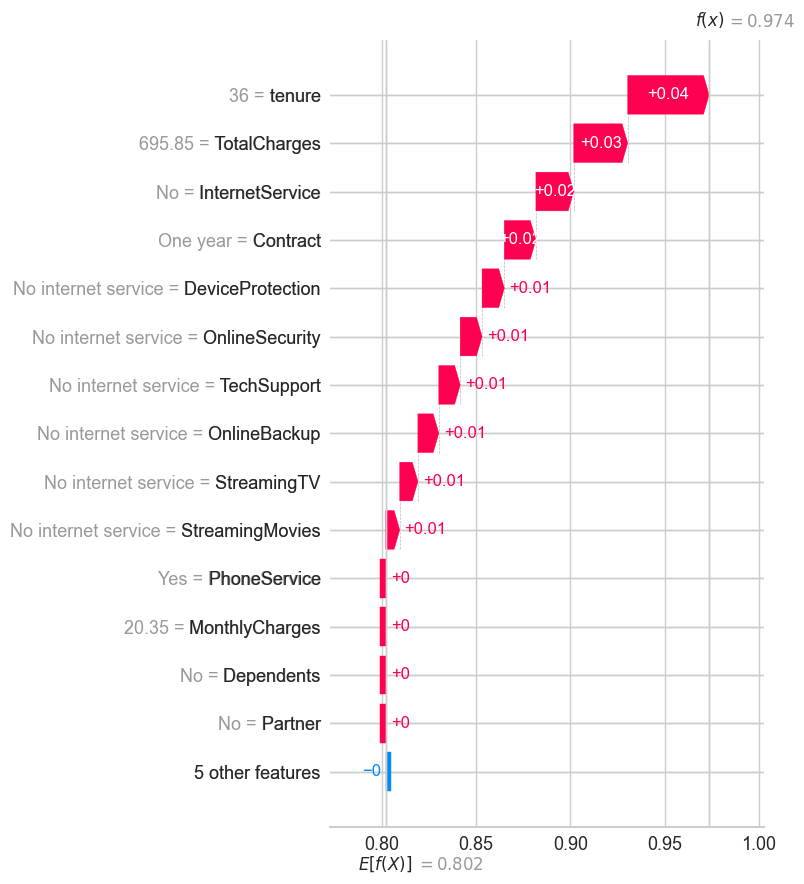

In [32]:
# Waterfall plot - bardziej czytelna alternatywa dla Force Plot
print("\n🌊 Generowanie Waterfall Plot (bardziej czytelny)...")

# Utworzenie obiektu Explanation dla Waterfall
shap_explanation_single = shap.Explanation(
    values=shap_values_to_plot[customer_idx],
    base_values=explainer.expected_value,
    data=X_sample.iloc[customer_idx].values,
    feature_names=X_sample.columns.tolist()
)

# Generowanie waterfall plot
plt.figure(figsize=(10, 8))
shap.waterfall_plot(shap_explanation_single, max_display=15, show=False)  # Pokaż top 15 cech
plt.tight_layout()

# Zapis
plt.savefig(f'plots/shap_waterfall_plot_customer_{customer_idx}.png', dpi=300, bbox_inches='tight')
print(f"✅ Waterfall plot zapisany jako: plots/shap_waterfall_plot_customer_{customer_idx}.png")

plt.show()

---
### 💼 Praktyczna analiza - co zrobić z tym klientem?

Na podstawie Waterfall Plot dla klienta #0 widzimy:

**Profil klienta:**
- tenure = 36 miesięcy (3 lata) - średni staż
- TotalCharges = 695.85 zł - niskie dla 3 lat! (19.3 zł/mies)
- MonthlyCharges = 20.35 zł - bardzo niski pakiet
- Contract = One year - ma kontrakt, ale niedługi
- Brak usług dodatkowych (InternetService = No)

**Diagnoza:**
Ten klient jest "dormant customer" (uśpiony):
- ✅ Jest już 3 lata (dobry znak)
- ❌ Płaci bardzo mało (brak zaangażowania)
- ❌ Nie korzysta z internetu ani usług dodatkowych
- ❌ Ma krótki kontrakt (One year)

**Rekomendowana akcja:**
1. **Cross-sell:** Zaproponuj pakiet internetowy + TV
2. **Upgrade:** "Płacisz 20 zł, za 40 zł dostaniesz 3x więcej!"
3. **Long-term contract:** Rabat za przejście na 2-letni kontrakt
4. **Bundle deal:** Internet + telefon taniej razem

**Cel:** Zwiększyć MonthlyCharges (zaangażowanie) i przedłużyć kontrakt

---
### 🌊 Alternatywa: Waterfall Plot (bardziej czytelny!)

**Waterfall Plot** to nowsza, bardziej czytelna wersja Force Plot. Pokazuje te same informacje w formie "wodospadu".

---
## 📋 Krok 11: Podsumowanie i wnioski końcowe

### ✅ Co zrobiliśmy:

1. ✅ **Wczytaliśmy Logistic Regression** - najlepszy model z projektu 07
2. ✅ **Feature Importance** → które cechy są ważne
3. ✅ **SHAP Summary Plot** → jak cechy wpływają (kierunek + siła)
4. ✅ **SHAP Bar Plot** → prosty ranking cech
5. ✅ **Force Plot i Waterfall Plot** → analiza pojedynczego klienta
6. ✅ **Eksport CSV** → dane do dalszej analizy

### 🎁 Kluczowe wnioski:

**Najważniejsze cechy wpływające na churn:**
1. **tenure** (długość bycia klientem) - NAJWAŻNIEJSZE! Nowi = ryzyko!
2. **TotalCharges** (łączne opłaty) - niskie = nowy klient = ryzyko
3. **MonthlyCharges** (miesięczne opłaty) - wysokie = irytacja = ryzyko!
4. **InternetService** (typ internetu) - Fiber = wysokie oczekiwania = ryzyko
5. **Contract** (rodzaj umowy) - miesięczne = łatwe odejście = ryzyko

### 💼 Konkretne działania biznesowe:

**1. Program dla nowych klientów (0-6 miesięcy):** 🎯 PRIORYTET #1
- Welcome pack z instrukcjami
- Dedykowany contact person przez pierwsze 3 miesiące
- Rabat w 2. miesiącu ("zostań z nami")
- Proaktywny kontakt w 1., 3., 6. miesiącu

**2. Optymalizacja cen:**
- Nie obniżaj cen wszystkim
- Targetuj klientów wysokiego ryzyka (score > 0.7)
- Oferuj więcej value zamiast niższej ceny
- Bundle deals (więcej usług za tę samą cenę)

**3. Zachęty do długich kontraktów:**
- 15% rabatu za roczny kontrakt
- 25% rabatu za 2-letni kontrakt
- Dodatkowe usługi za darmo (HBO, więcej GB)

**4. Specjalna obsługa Fiber optic:**
- Quality assurance calls
- Priorytetowe wsparcie techniczne
- Edukacja o korzyściach szybkiego internetu
- Cross-sell dodatkowych usług (OnlineSecurity, TechSupport)

### 🚀 Następne kroki:

1. **Implementacja modelu** w systemie CRM
2. **Automatyzacja** predykcji (daily batch)
3. **A/B testing** strategii retencyjnych
4. **Monitoring** efektywności działań
5. **Re-training** modelu (co 3 miesiące)

### 📚 Co dalej się uczyć:

- **LIME** → alternatywa dla SHAP
- **Dependence plots** → interakcje między cechami
- **Fairness analysis** → czy model jest bezstronny
- **ICE plots** → indywidualne warunkowe oczekiwania

---

## 🎉 Gratulacje!

Teraz umiesz:
- ✅ Interpretować modele ML
- ✅ Używać SHAP do wyjaśnień
- ✅ Tłumaczyć wyniki na język biznesu
- ✅ Podejmować data-driven decisions

**Pamiętaj:** Model to nie czarna skrzynka - zawsze możesz wyjaśnić jego decyzje! 🚀

---
## 📊 BONUS: Eksport wyników dla managementu

In [30]:
# Stworzenie tabeli z najważniejszymi cechami i ich wpływem
print("="*80)
print("📊 EKSPORT WYNIKÓW")
print("="*80)

# Obliczenie średniego absolutnego wpływu dla każdej cechy
feature_importance_shap = pd.DataFrame({
    'Feature': X_sample.columns,  # Nazwy cech
    'Mean_Absolute_SHAP': np.abs(shap_values_to_plot).mean(axis=0)  # Średni absolutny wpływ
})

# Sortowanie od najważniejszej do najmniej ważnej
feature_importance_shap = feature_importance_shap.sort_values('Mean_Absolute_SHAP', ascending=False)

# Zapis do CSV
feature_importance_shap.to_csv('data/feature_importance_shap.csv', index=False)
print("\n✅ Ranking cech zapisany do: feature_importance_shap.csv")

# Wyświetlenie top 10
print("\n🏆 TOP 10 najważniejszych cech:")
print(feature_importance_shap.head(10).to_string(index=False))

📊 EKSPORT WYNIKÓW

✅ Ranking cech zapisany do: feature_importance_shap.csv

🏆 TOP 10 najważniejszych cech:
         Feature  Mean_Absolute_SHAP
          tenure            0.077525
 InternetService            0.031021
        Contract            0.030508
    TotalCharges            0.020747
  MonthlyCharges            0.017204
 StreamingMovies            0.010742
     TechSupport            0.009715
  OnlineSecurity            0.008724
     StreamingTV            0.007491
PaperlessBilling            0.006097
